In [17]:
import pandas as pd
file='/Users/jackjones/Desktop/assignment/it722/as2/2.1.csv'
df = pd.read_csv(file)
df.describe()

import numpy as np

columns = df.columns

columns_list = list(columns)

for column_name in columns_list:
    
    print("____________"+column_name+"____________")
    if df[column_name].dtype == "int64" or df[column_name].dtype == "float64":
        # calculate IQR
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        
        # define bound
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # drop outlier
        df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
        

# filter data
df.drop(['Address', 'SicCodes', 'CompanyLinkToGPGInfo','ResponsiblePerson','EmployerSize','CurrentName'
         ,'SubmittedAfterTheDeadline','DueDate'], axis=1, inplace=True)
df.info()

____________EmployerName____________
____________Address____________
____________CompanyNumber____________
____________SicCodes____________
____________DiffMeanHourlyPercent____________
____________DiffMedianHourlyPercent____________
____________DiffMeanBonusPercent____________
____________DiffMedianBonusPercent____________
____________MaleBonusPercent____________
____________FemaleBonusPercent____________
____________MaleLowerQuartile____________
____________FemaleLowerQuartile____________
____________MaleLowerMiddleQuartile____________
____________FemaleLowerMiddleQuartile____________
____________MaleUpperMiddleQuartile____________
____________FemaleUpperMiddleQuartile____________
____________MaleTopQuartile____________
____________FemaleTopQuartile____________
____________CompanyLinkToGPGInfo____________
____________ResponsiblePerson____________
____________EmployerSize____________
____________CurrentName____________
____________SubmittedAfterTheDeadline____________
____________DueD

In [16]:
# clean data
df = df.interpolate(method='pchip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EmployerName               10565 non-null  object 
 1   CompanyNumber              9206 non-null   object 
 2   DiffMeanHourlyPercent      10565 non-null  float64
 3   DiffMedianHourlyPercent    10565 non-null  float64
 4   DiffMeanBonusPercent       10565 non-null  float64
 5   DiffMedianBonusPercent     10565 non-null  float64
 6   MaleBonusPercent           10565 non-null  float64
 7   FemaleBonusPercent         10565 non-null  float64
 8   MaleLowerQuartile          10565 non-null  float64
 9   FemaleLowerQuartile        10565 non-null  float64
 10  MaleLowerMiddleQuartile    10565 non-null  float64
 11  FemaleLowerMiddleQuartile  10565 non-null  float64
 12  MaleUpperMiddleQuartile    10565 non-null  float64
 13  FemaleUpperMiddleQuartile  10565 non-null  flo

In [18]:
file2='/Users/jackjones/Desktop/assignment/it722/as2/2.2.csv'
df2 = pd.read_csv(file2)
#df.describe(include='all')
#df.info()


columns = df2.columns

columns_list = list(columns)

for column_name in columns_list:
    
    print("____________"+column_name+"____________")
    if df2[column_name].dtype == "int64" or df2[column_name].dtype == "float64":
        # calculate IQR
        Q1 = df2[column_name].quantile(0.25)
        Q3 = df2[column_name].quantile(0.75)
        IQR = Q3 - Q1
        
        # define bound
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # drop outlier
        df2 = df2[(df2[column_name] >= lower_bound) & (df2[column_name] <= upper_bound)]

# filter data
df2.drop(['Address', 'SicCodes', 'CompanyLinkToGPGInfo','ResponsiblePerson'
         ,'EmployerSize','CurrentName','SubmittedAfterTheDeadline','DueDate'], axis=1, inplace=True)

# clean data
df2 = df2.interpolate(method='pchip')
df2.info()

____________EmployerName____________
____________Address____________
____________CompanyNumber____________
____________SicCodes____________
____________DiffMeanHourlyPercent____________
____________DiffMedianHourlyPercent____________
____________DiffMeanBonusPercent____________
____________DiffMedianBonusPercent____________
____________MaleBonusPercent____________
____________FemaleBonusPercent____________
____________MaleLowerQuartile____________
____________FemaleLowerQuartile____________
____________MaleLowerMiddleQuartile____________
____________FemaleLowerMiddleQuartile____________
____________MaleUpperMiddleQuartile____________
____________FemaleUpperMiddleQuartile____________
____________MaleTopQuartile____________
____________FemaleTopQuartile____________
____________CompanyLinkToGPGInfo____________
____________ResponsiblePerson____________
____________EmployerSize____________
____________CurrentName____________
____________SubmittedAfterTheDeadline____________
____________DueD

In [20]:
#merge the data
result = pd.concat([df,df2])
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11488 entries, 0 to 3293
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EmployerName               11488 non-null  object 
 1   CompanyNumber              9987 non-null   object 
 2   DiffMeanHourlyPercent      11488 non-null  float64
 3   DiffMedianHourlyPercent    11488 non-null  float64
 4   DiffMeanBonusPercent       11488 non-null  float64
 5   DiffMedianBonusPercent     11488 non-null  float64
 6   MaleBonusPercent           11488 non-null  float64
 7   FemaleBonusPercent         11488 non-null  float64
 8   MaleLowerQuartile          11488 non-null  float64
 9   FemaleLowerQuartile        11488 non-null  float64
 10  MaleLowerMiddleQuartile    11488 non-null  float64
 11  FemaleLowerMiddleQuartile  11488 non-null  float64
 12  MaleUpperMiddleQuartile    11488 non-null  float64
 13  FemaleUpperMiddleQuartile  11488 non-null  floa

In [22]:
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='normal')
result['DiffMedianHourlyPercent'] = quantile_transformer.fit_transform(result[['DiffMedianHourlyPercent']])
result['DiffMeanBonusPercent'] = quantile_transformer.fit_transform(result[['DiffMedianHourlyPercent']])
result['DiffMedianBonusPercent'] = quantile_transformer.fit_transform(result[['DiffMedianHourlyPercent']])

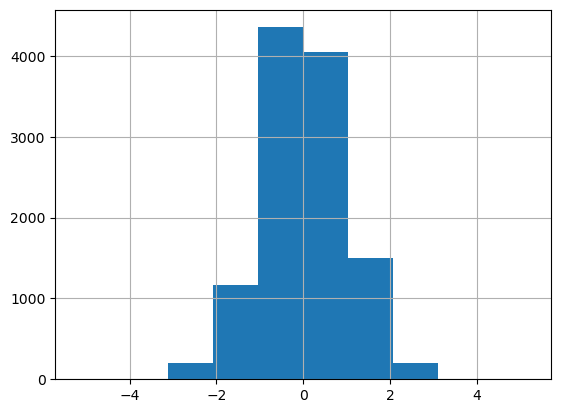

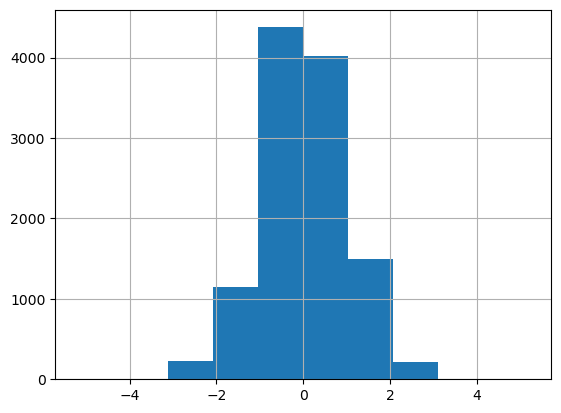

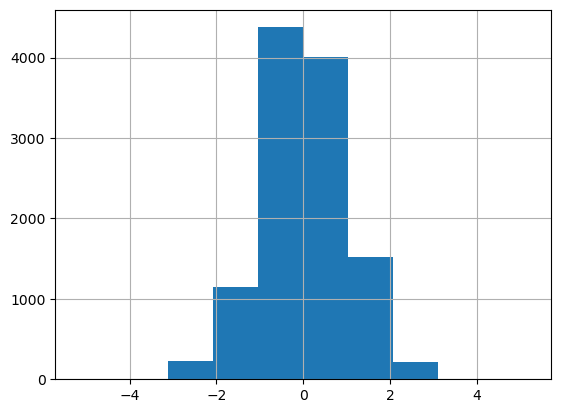

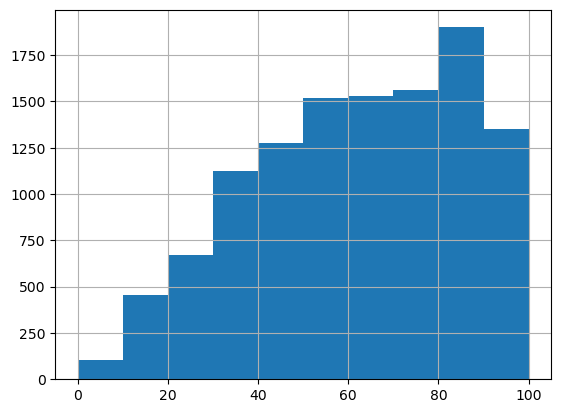

In [19]:


import matplotlib.pyplot as plt
result["DiffMedianHourlyPercent"].hist()
plt.show()

result["DiffMeanBonusPercent"].hist()
plt.show()

result["DiffMedianBonusPercent"].hist()
plt.show()

result["MaleTopQuartile"].hist()
plt.show()


